## Inspecting the tf run output for the custom kanto classifier


### Inspect the files contents

In [8]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import os

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/resnet50/events.out.tfevents.first_part.0",
    "../final-runs/resnet50/events.out.tfevents.second_part.0",
]

# Read the file and print available tags and data
print("Reading tfevents files...\n")
for tfevents_path in tfevents_paths:
    print(f"Processing file: {os.path.basename(tfevents_path)}")
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            print(f"Step: {event.step}, Tag: {value.tag}, Value: {value.simple_value}")


Reading tfevents files...

Processing file: events.out.tfevents.first_part.0
Step: 35, Tag: Batch Loss, Value: 6.694910049438477
Step: 45, Tag: Batch Loss, Value: 7.101638317108154
Step: 55, Tag: Batch Loss, Value: 5.974695205688477
Step: 65, Tag: Batch Loss, Value: 5.13063383102417
Step: 1, Tag: Epoch Training Loss, Value: 6.601754665374756
Step: 1, Tag: Epoch Training Accuracy, Value: 1.0395314693450928
Step: 1, Tag: Training Precision, Value: 0.7062573432922363
Step: 1, Tag: Training Recall, Value: 0.6893418431282043
Step: 1, Tag: Training F1 Score, Value: 0.3037257194519043
Step: 1, Tag: Training Learning Rate, Value: 0.009999999776482582
Step: 2, Tag: Epoch Validation Accuracy, Value: 0.6441223621368408
Step: 2, Tag: Epoch Validation Loss, Value: 35039.1484375
Step: 2, Tag: Epoch Validation Precision, Value: 0.004395696800202131
Step: 2, Tag: Epoch Validation Recall, Value: 0.6622516512870789
Step: 2, Tag: Epoch Validation F1 Score, Value: 0.008733425289392471
Step: 2, Tag: Epoch 

In [9]:
# Check each unique tag in the file

tags = set()
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            tags.add(value.tag)

print("\nUnique tags in the file:")
for tag in tags:
    print(tag)


Unique tags in the file:
Class Accuracy/Goldeen
Epoch Validation Loss
Class Accuracy/Persian
Class Accuracy/Squirtle
Class Accuracy/Caterpie
Class Accuracy/Flareon
Class Accuracy/Electabuzz
Class Accuracy/Pidgeotto
Class Accuracy/Marowak
Class Accuracy/Golem
Class Accuracy/Bulbasaur
Class Accuracy/Porygon
Class Accuracy/Staryu
Class Accuracy/Farfetchd
Class Accuracy/Weezing
Class Accuracy/Jigglypuff
Class Accuracy/Wartortle
Class Accuracy/Ponyta
Class Accuracy/Arcanine
Class Accuracy/Dewgong
Class Accuracy/Ditto
Class Accuracy/Hypno
Epoch Training Accuracy
Class Accuracy/Slowbro
Class Accuracy/Ivysaur
Class Accuracy/Aerodactyl
Class Accuracy/Weedle
Class Accuracy/Golbat
Class Accuracy/Ekans
Class Accuracy/Seel
Class Accuracy/Koffing
Class Accuracy/Rattata
Class Accuracy/Rhydon
Class Accuracy/Seadra
Class Accuracy/Victreebel
Class Accuracy/Sandshrew
Class Accuracy/Kabuto
Class Accuracy/Meowth
Class Accuracy/Tentacruel
Class Accuracy/Starmie
Class Accuracy/Zapdos
Class Accuracy/Gengar
E

Epoch 1: Training Loss = 6.601754665374756
Epoch 1: Training Accuracy = 1.0395314693450928
Epoch 2: Validation Accuracy = 0.6441223621368408
Epoch 2: Validation Loss = 35039.1484375
Epoch 2: Training Loss = 5.0847368240356445
Epoch 2: Training Accuracy = 1.1248841285705566
Epoch 3: Validation Accuracy = 1.8884496688842773
Epoch 3: Validation Loss = 27.44434356689453
Epoch 3: Training Loss = 4.734882831573486
Epoch 3: Training Accuracy = 2.4840173721313477
Epoch 4: Validation Accuracy = 3.7622604370117188
Epoch 4: Validation Loss = 7.255457878112793
Epoch 4: Training Loss = 4.494266986846924
Epoch 4: Training Accuracy = 3.7650675773620605
Epoch 5: Validation Accuracy = 4.7284440994262695
Epoch 5: Validation Loss = 4.376482009887695
Epoch 5: Training Loss = 4.277883529663086
Epoch 5: Training Accuracy = 4.977795124053955
Epoch 6: Validation Accuracy = 6.075244903564453
Epoch 6: Validation Loss = 4.240098476409912
Epoch 6: Training Loss = 4.088308334350586
Epoch 6: Training Accuracy = 6.6

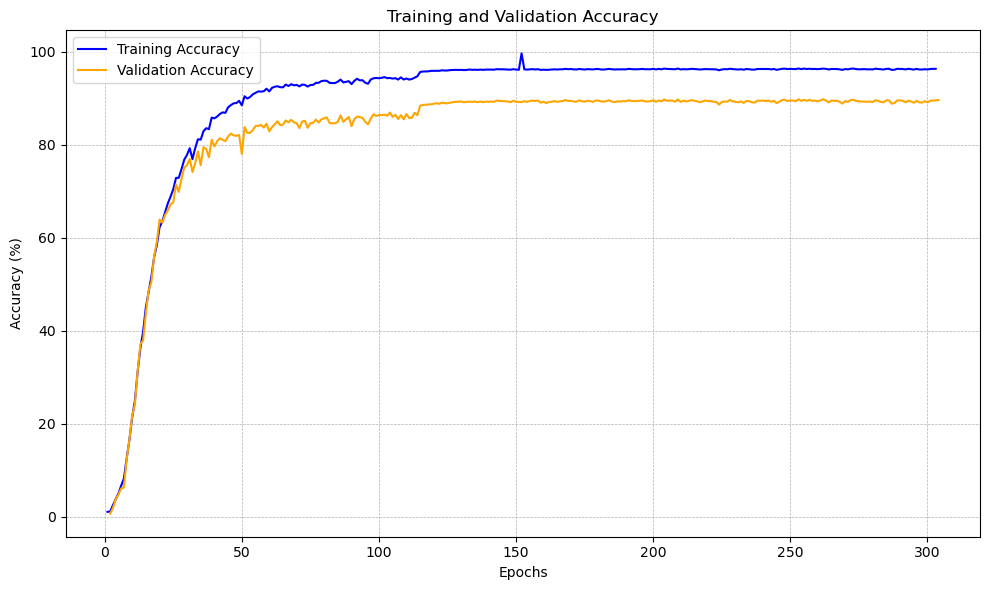

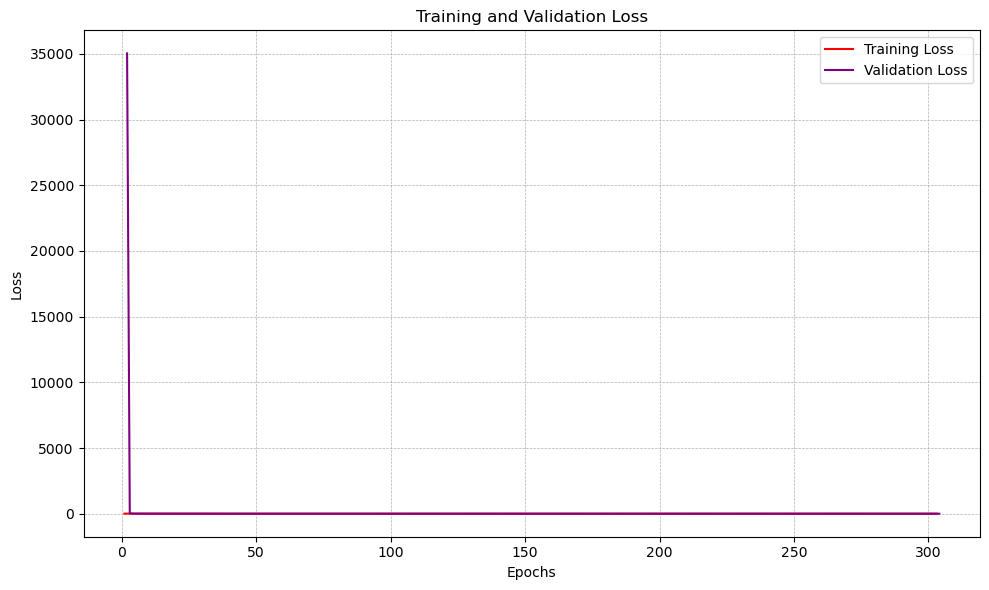

In [10]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt


# Initialize empty lists for metrics
epoch_steps_train = []
epoch_train_accuracy = []
epoch_train_loss = []
epoch_steps_val = []
epoch_val_accuracy = []
epoch_val_loss = []

# Initalize empty lists for batch metrics
batch_steps_train = []
batch_loss = []

# Parse the tfevents file
for tfevents_path in tfevents_paths:
    for summary in summary_iterator(tfevents_path):
        for value in summary.summary.value:
            if value.tag == "Epoch Training Accuracy":  # Training accuracy
                epoch_steps_train.append(summary.step)
                print(f"Epoch {summary.step}: Training Accuracy = {value.simple_value}")
                epoch_train_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Validation Accuracy":  # Validation accuracy
                print(f"Epoch {summary.step}: Validation Accuracy = {value.simple_value}")
                epoch_steps_val.append(summary.step)
                epoch_val_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Training Loss":  # Training loss
                print(f"Epoch {summary.step}: Training Loss = {value.simple_value}")
                epoch_train_loss.append(value.simple_value)
            elif value.tag == "Epoch Validation Loss": # Validation loss
                print(f"Epoch {summary.step}: Validation Loss = {value.simple_value}")
                epoch_val_loss.append(value.simple_value)
            elif value.tag == "Batch Loss":  # Batch loss
                batch_steps_train.append(summary.step)
                batch_loss.append(value.simple_value)

#print final values
print("\n")
print("Final epoch: ", epoch_steps_train[-1])
print("Final Training Accuracy: ", epoch_train_accuracy[-1])
print("Final Validation Accuracy: ", epoch_val_accuracy[-1])
print("Final Training Loss: ", epoch_train_loss[-1])
print("Final Validation Loss: ", epoch_val_loss[-1])
print("Final Batch Loss: ", batch_loss[-1])

# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_accuracy, label="Training Accuracy", color="blue")
plt.plot(epoch_steps_val, epoch_val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_loss, label="Training Loss", color="red")
plt.plot(epoch_steps_val, epoch_val_loss, label="Validation Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# # Plot 3: Batch Loss
# plt.figure(figsize=(10, 6))
# plt.plot(batch_steps_train, batch_loss, label="Batch Loss", color="green", linestyle="-.")
# plt.xlabel("Steps")
# plt.ylabel("Loss")
# plt.title("Batch Loss")
# plt.legend()
# plt.grid(visible=True, linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.show()



Reading tfevents file...

Top 10 Best Class Accuracies:
1. Blastoise: 100.00%
2. Oddish: 100.00%
3. Paras: 100.00%
4. Tentacruel: 100.00%
5. Vaporeon: 100.00%
6. Eevee: 98.18%
7. Pinsir: 97.92%
8. Cubone: 97.83%
9. Weepinbell: 97.78%
10. Electabuzz: 97.73%


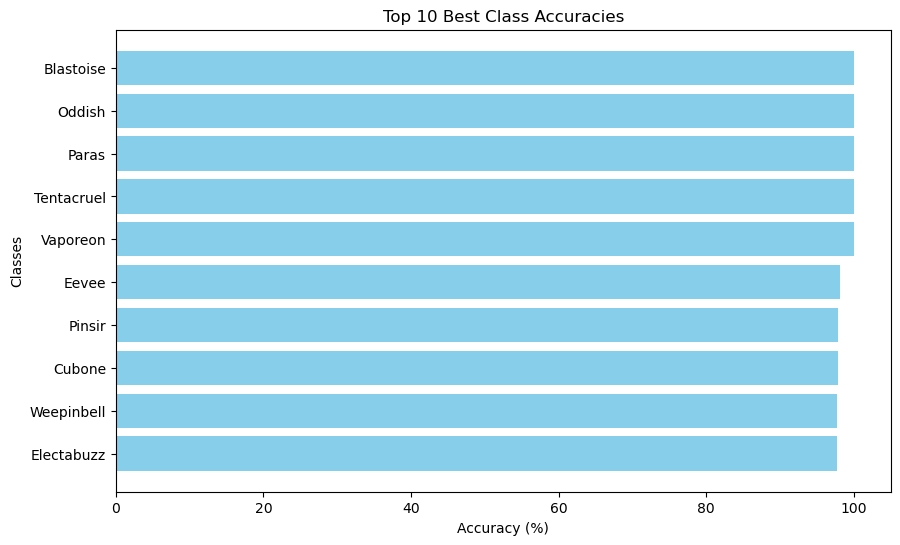

Top 10 Worst Class Accuracies:
1. Muk: 65.71%
2. Nidoran-m: 70.59%
3. Onix: 73.08%
4. Poliwrath: 77.55%
5. Marowak: 78.05%
6. Poliwhirl: 78.33%
7. Rhyhorn: 78.57%
8. Weezing: 78.57%
9. Ninetales: 80.00%
10. Venonat: 80.00%


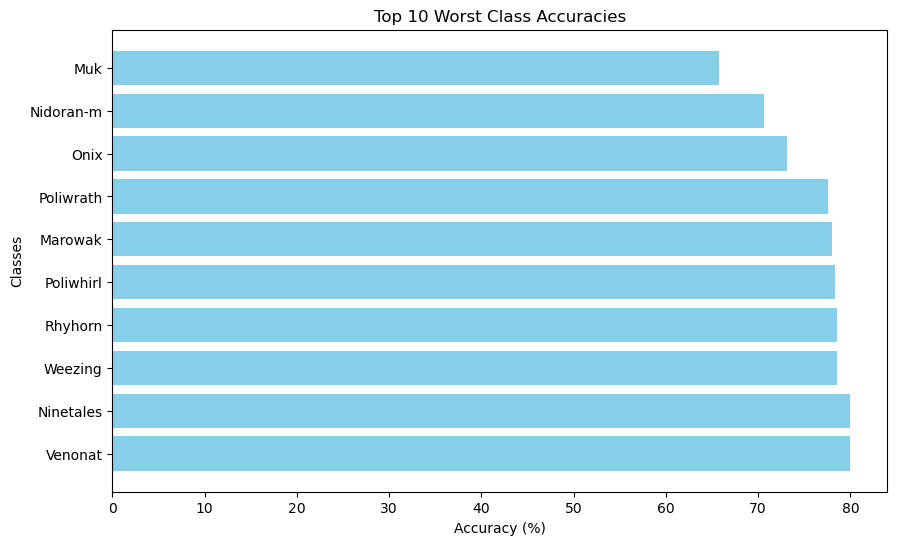

In [11]:
# Get top 10 best class accuracy

from tensorflow.python.summary.summary_iterator import summary_iterator
import re
import matplotlib.pyplot as plt

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/custom_kanto/events.out.tfevents.first_part.0",
    "../final-runs/custom_kanto/events.out.tfevents.second_part.0",
]

# Regex pattern to match "Class Accuracy/*"
pattern = r"Class Accuracy/([\w\s-]+)"

# Dictionary to store class accuracies
class_accuracies = {}

# Read the tfevents file
print("Reading tfevents file...\n")
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            # Check if the tag matches "Class Accuracy/*"
            match = re.match(pattern, value.tag)
            if match:
                class_name = match.group(1)  # Extract class name
                class_accuracies[class_name] = value.simple_value  # Store the accuracy

# Sort the classes by accuracy in descending order and select the top 10
top_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*top_10)

# Print the top 10 class accuracies
print("Top 10 Best Class Accuracies:")
for i, (class_name, accuracy) in enumerate(top_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Best Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# now lets get the worst 10 class accuracy
worst_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=False)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*worst_10)

# Print the top 10 class accuracies
print("Top 10 Worst Class Accuracies:")
for i, (class_name, accuracy) in enumerate(worst_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Worst Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



